In [5]:
import pickle
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
models = ['mel256-ec-base','mel256-ec-base-fma','mel256-ec-base-ll']

r2s = {m: [] for m in models}
all_data = []
for model in models:
    for i in range(10):
        with open(f'../auditory_brain_dnn/results/{model}/AUD-MAPPING-Ridge_TARGET-NH2015_SOURCE-{model}-{i}_RANDNETW-False_ALPHALIMIT-50/df_output.pkl', 'rb') as f:
            data = pickle.load(f)
            r2s[model].append(data['median_r2_test_c'].median())
            data['layer']=i
            data['model']=model
            all_data.append(data)
all_data = pd.concat(all_data)

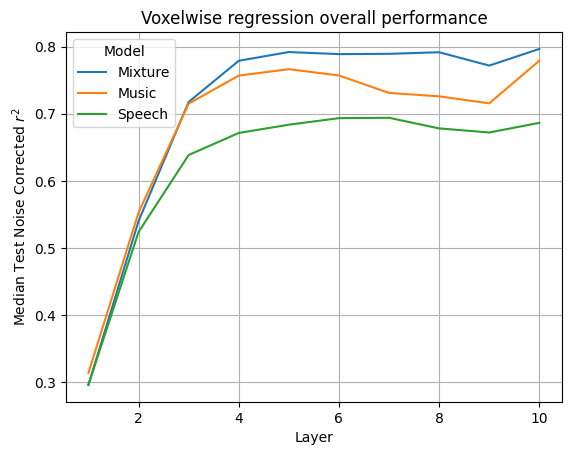

In [7]:
for k,v in r2s.items():
    model_map = {'mel256-ec-base': 'Mixture',
                 'mel256-ec-base-fma': 'Music',
                 'mel256-ec-base-ll': 'Speech'}
    plt.plot(np.arange(1,11), v, label=model_map[k])
plt.legend(title='Model')
plt.xlabel('Layer')
plt.ylabel('Median Test Noise Corrected $r^2$')
plt.title('Voxelwise regression overall performance') 
plt.grid('on')

([], [])

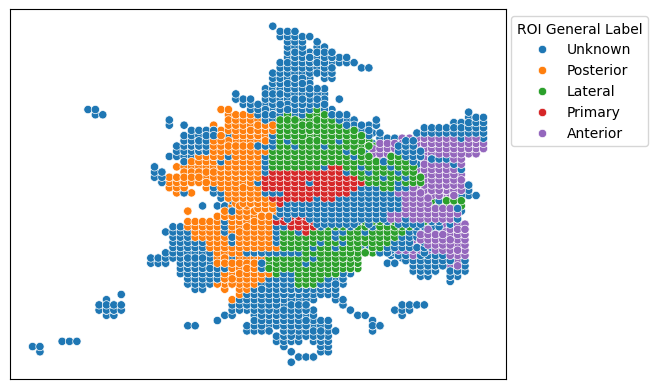

In [8]:
data.loc[data['roi_label_general'].isna(),'roi_label_general']='Unknown'
sns.scatterplot(data=data,x='x_ras', y='y_ras', hue='roi_label_general')
plt.legend(title='ROI General Label', bbox_to_anchor=(0.3,0,1,1))
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])

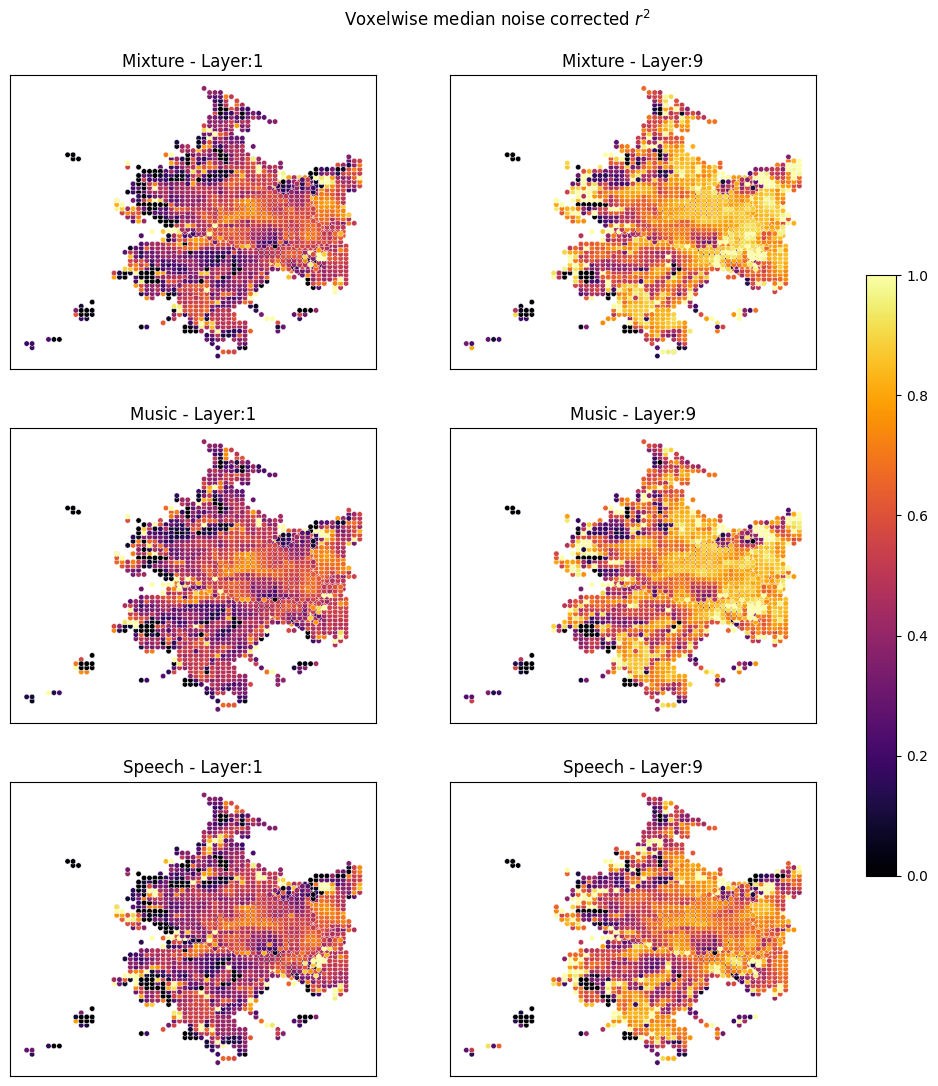

In [9]:
voxel_data = pd.read_pickle('../auditory_brain_dnn/data/neural/NH2015/df_roi_meta.pkl').set_index('voxel_id')

fig,ax = plt.subplots(nrows=3, ncols=2, figsize=(13,13))

for i,layer in enumerate([1,9]):
    for j,model in enumerate(models):
        model_data = all_data.loc[all_data['model']==model]
        model_data = model_data.reset_index(drop=True)
        #max_rows = model_data.loc[model_data.groupby('voxel_id')['median_r2_test_c'].idxmax()]
        #model_voxels = pd.merge(max_rows, voxel_data, left_on='voxel_id', right_on='voxel_id')
        model_data.loc[model_data['median_r2_test_c']>1,'median_r2_test_c']=1
        sns.scatterplot(model_data.loc[model_data['layer']==layer], x='x_ras', y='y_ras', hue='median_r2_test_c', palette='inferno', ax=ax[j,i], legend=False, s=15)
        ax[j,i].set_title('{} - Layer:{}'.format(model_map[model], layer))
        ax[j,i].set_xlabel('')
        ax[j,i].set_ylabel('')
        ax[j,i].set_xticks([])
        ax[j,i].set_yticks([])
norm = plt.Normalize(0, 1)
sm = plt.cm.ScalarMappable(cmap="inferno", norm=norm)
sm.set_array([])
plt.suptitle('Voxelwise median noise corrected $r^2$',y=0.93)
fig.colorbar(sm,ax=ax,shrink=0.6)


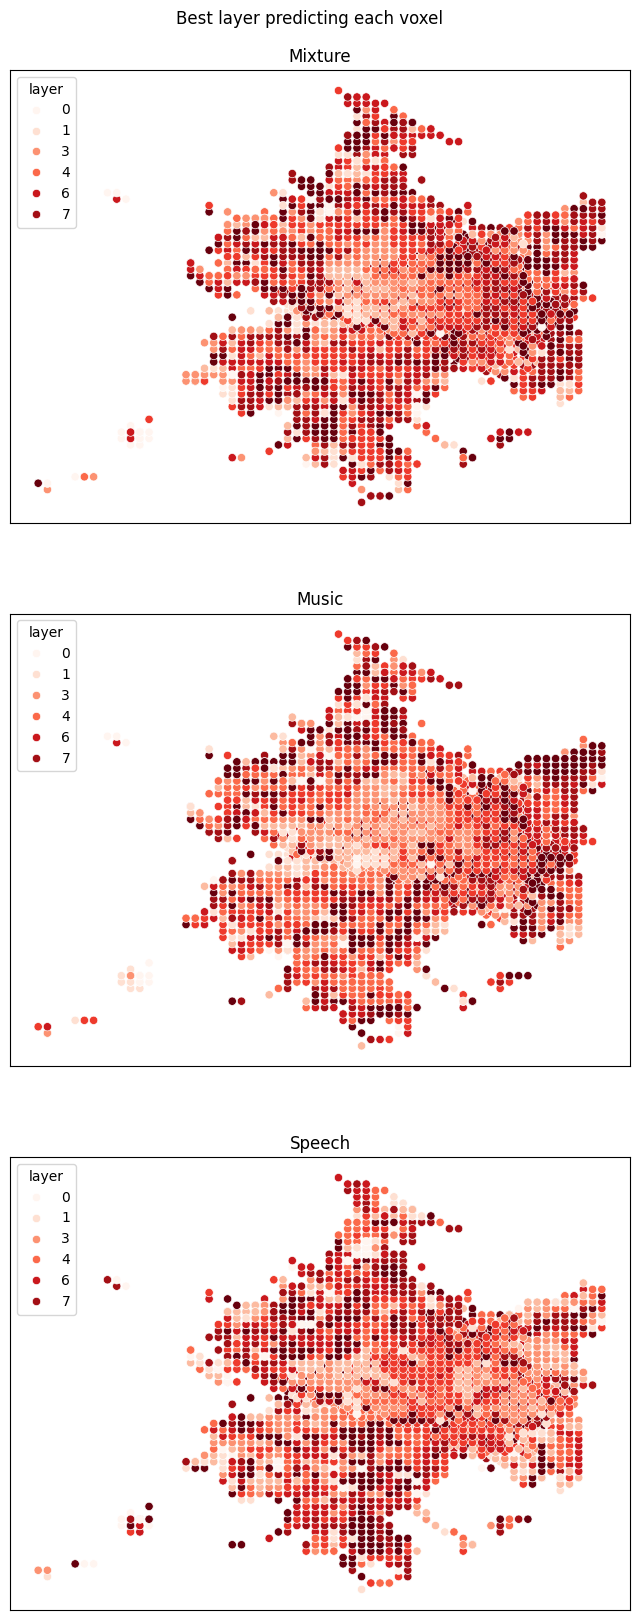

In [10]:
import seaborn as sns

voxel_data = pd.read_pickle('../auditory_brain_dnn/data/neural/NH2015/df_roi_meta.pkl').set_index('voxel_id')

fig,ax = plt.subplots(nrows=3, figsize=(8,20))
plt.suptitle('Best layer predicting each voxel',y=0.91)
for j,model in enumerate(models):
    model_data = all_data.loc[all_data['model']==model]
    model_data = model_data.reset_index(drop=True)
    model_data = model_data.loc[model_data['layer']<9]
    max_rows = model_data.loc[model_data.groupby('voxel_id')['median_r2_test_c'].idxmax()]
    model_voxels = pd.merge(max_rows, voxel_data, left_on='voxel_id', right_on='voxel_id')
    model_data.loc[model_data['median_r2_test_c']>1,'median_r2_test_c']=1
    sns.scatterplot(model_voxels, x='x_ras_x', y='y_ras_x', hue='layer', palette='Reds', ax=ax[j])
    ax[j].set_title(model_map[model])
    ax[j].set_xlabel('')
    ax[j].set_ylabel('')
    ax[j].set_xticks([])
    ax[j].set_yticks([])